In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [2]:
car= pd.read_csv("car_data.csv")

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.shape

(892, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
car["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [7]:
car["fuel_type"].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

## Issues in data 
- year has non-year values, 
- object to int
- price may ask for price
- price object to int
- kms_driven has kms with integers
- kms_driven object to int
- kms_driven has nan values
- fule_types has nan values
- keep first three words of name

# Cleaning of data

In [8]:
backup=car.copy()

In [9]:
car["year"]

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
887    zest
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 892, dtype: object

In [10]:
car=car[car["year"].str.isnumeric()]

In [11]:
car["year"]

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: object

In [12]:
car["year"]=car["year"].astype(int)

In [13]:
car["year"]

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: int32

In [14]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


In [15]:
car["company"].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Force', 'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'],
      dtype=object)

In [16]:
car=car[car["Price"]!="Ask For Price"]

In [17]:
car["Price"]

0        80,000
1      4,25,000
3      3,25,000
4      5,75,000
6      1,75,000
         ...   
886    3,00,000
888    2,60,000
889    3,90,000
890    1,80,000
891    1,60,000
Name: Price, Length: 819, dtype: object

In [18]:
car["Price"]=car["Price"].str.replace(',','').astype(int)

In [19]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [20]:
car["kms_driven"]

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object

In [21]:
car["kms_driven"]=car["kms_driven"].str.split(' ')

In [22]:
car["kms_driven"]

0        [45,000, kms]
1            [40, kms]
3        [28,000, kms]
4        [36,000, kms]
6        [41,000, kms]
            ...       
886    [1,32,000, kms]
888      [27,000, kms]
889      [40,000, kms]
890           [Petrol]
891           [Petrol]
Name: kms_driven, Length: 819, dtype: object

In [23]:
car["kms_driven"]=car["kms_driven"].str.get(0).str.replace(',','')

In [24]:
car["kms_driven"]

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

In [25]:
car=car[car["kms_driven"].str.isnumeric()]

In [26]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.3+ KB


In [27]:
car["kms_driven"]=car["kms_driven"].astype(int)

In [28]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [29]:
car=car[~car["fuel_type"].isna()]

In [30]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [31]:
car["name"]

0        Hyundai Santro Xing XO eRLX Euro III
1                     Mahindra Jeep CL550 MDI
3      Hyundai Grand i10 Magna 1.2 Kappa VTVT
4            Ford EcoSport Titanium 1.5L TDCi
6                                   Ford Figo
                        ...                  
883                Maruti Suzuki Ritz VXI ABS
885                 Tata Indica V2 DLE BS III
886                      Toyota Corolla Altis
888                       Tata Zest XM Diesel
889                        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [32]:
car["name"]=car["name"].str.split(' ').str.slice(0,3).str.join(' ')

In [33]:
car["name"]

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [34]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [35]:
car.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [36]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [37]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [38]:
car[car["Price"]<6e6].reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [39]:
print(car.fuel_type.value_counts())

Petrol    428
Diesel    386
LPG         2
Name: fuel_type, dtype: int64


In [40]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [41]:
car.to_csv("clean_car_data.csv")

# Encoding Categorical data

In [42]:
#Encoding "fuel_type" column
car.replace({"fuel_type":{"Petrol":0,"Diesel":1,"LPG":2}},inplace=True)

In [43]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,0
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,1
3,Hyundai Grand i10,Hyundai,2014,325000,28000,0
4,Ford EcoSport Titanium,Ford,2014,575000,36000,1
6,Ford Figo,Ford,2012,175000,41000,1


In [44]:
print(car.fuel_type.value_counts())

0    428
1    386
2      2
Name: fuel_type, dtype: int64


# Data Visualization 

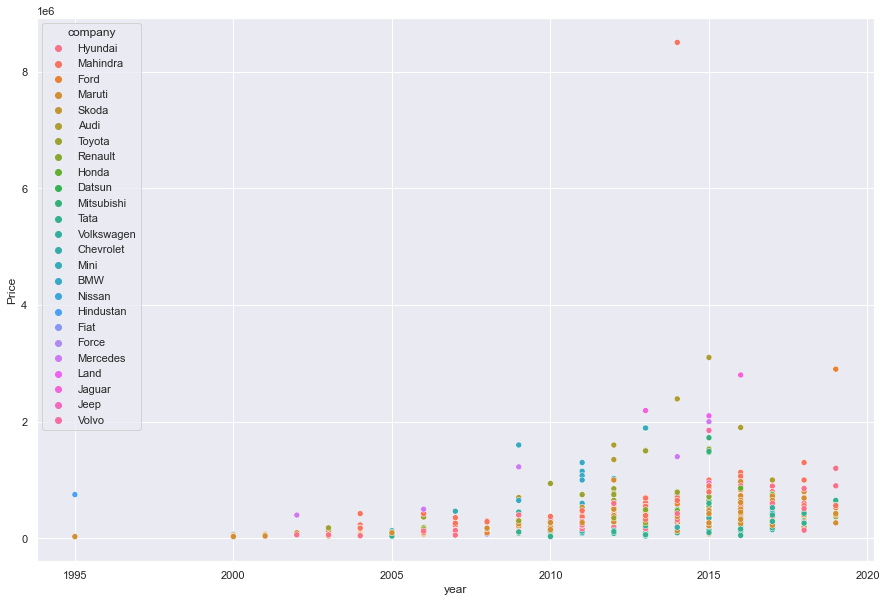

In [86]:
sns.scatterplot(x="year",y="Price",data=car,hue="company")
plt.show()

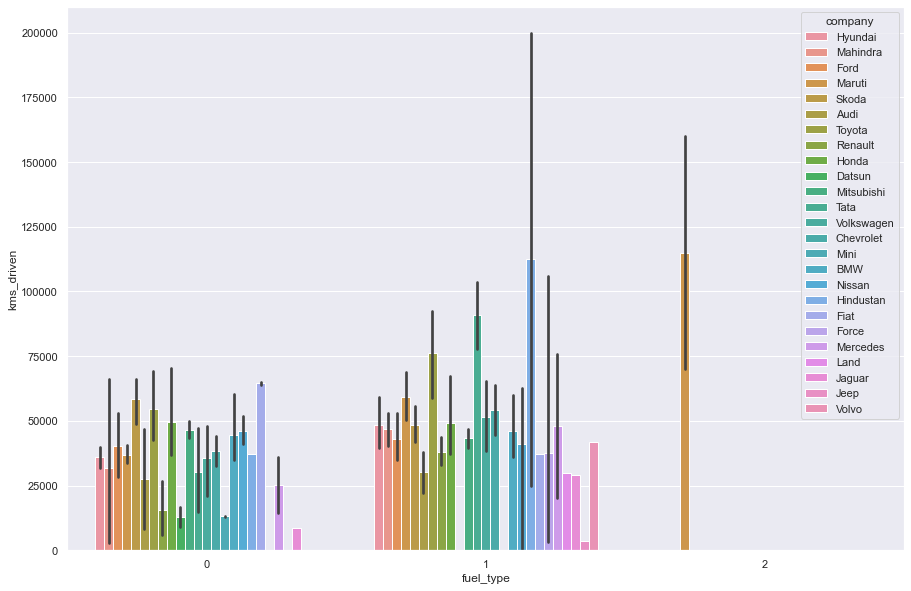

In [46]:
sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="fuel_type",y="kms_driven", data=car,hue="company")
plt.show()

# Splitting the data into Training data and Test data

In [47]:
x=car.drop(["name","company","Price"],axis=1)
y=car["Price"]

In [48]:
x

,year,kms_driven,fuel_type
0,2007,45000,0
1,2006,40,1
3,2014,28000,0
4,2014,36000,1
6,2012,41000,1
...,...,...,...
883,2011,50000,0
885,2009,30000,1
886,2009,132000,0
888,2018,27000,1


In [49]:
y

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
883    270000
885    110000
886    300000
888    260000
889    390000
Name: Price, Length: 816, dtype: int32

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=2)

# Model

# Linear Regression

In [87]:
lin_reg_model = LinearRegression()

In [88]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [89]:
# Prediction on Training data

In [90]:
training_data_pred = lin_reg_model.predict(x_train)

In [91]:
error_score = metrics.r2_score(y_train, training_data_pred)

In [92]:
print("R squared error: ",error_score)

R squared error:  0.10654808239061664


 Visualization of actual price and predicted price

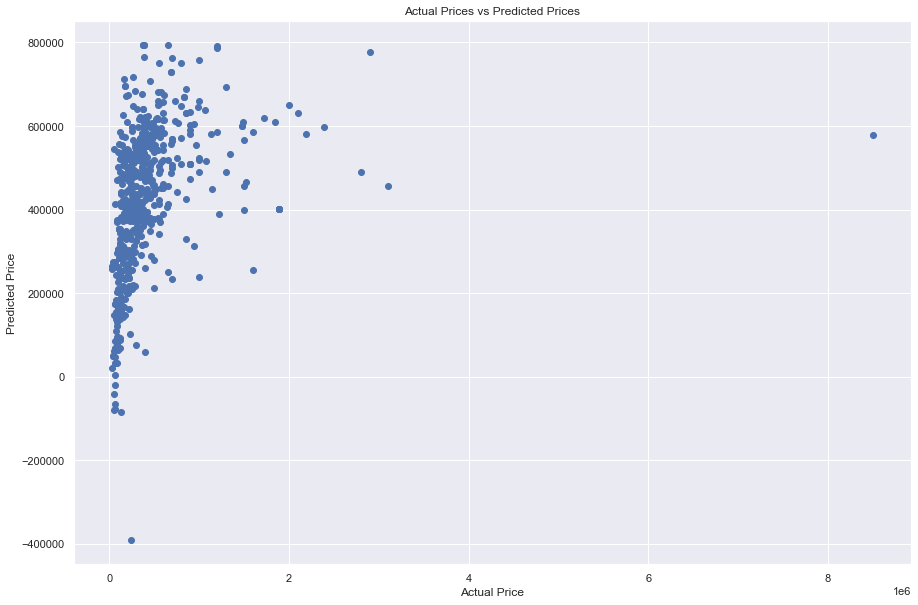

In [93]:
plt.scatter(y_train, training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [94]:
# Prediction on Test data

In [95]:
test_data_pred = lin_reg_model.predict(x_test)

Error Calculation

In [96]:
mean_squared_error(y_test, test_data_pred)

95335988810.89476

In [97]:
error_score = metrics.r2_score(y_test, test_data_pred)

In [98]:
print("R squared error: ",error_score)

R squared error:  0.11055761216390136


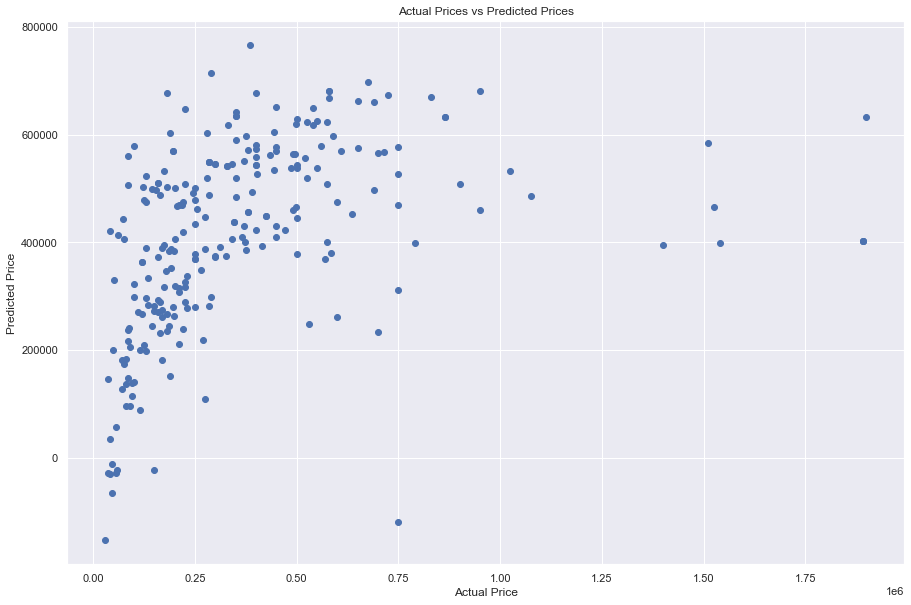

In [99]:
plt.scatter(y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

# Logistic Regression                 

In [100]:
from warnings import simplefilter
# ignore all warnings
simplefilter(action='ignore')

In [101]:
log_reg_model = LogisticRegression()

In [102]:
log_reg_model.fit(x_train,y_train)

LogisticRegression()

In [103]:
# Prediction on Training data

In [104]:
log_training_data_pred = log_reg_model.predict(x_train)

In [105]:
log_error_score = metrics.r2_score(y_train, log_training_data_pred)

In [106]:
print("R squared error: ",log_error_score)

R squared error:  0.999646425740855


In [107]:
# Prediction on Test data

In [108]:
log_test_data_pred = log_reg_model.predict(x_test)

Error Calculation

In [109]:
mean_squared_error(y_test, log_test_data_pred)

219122049.1755102

In [110]:
log_error_score = metrics.r2_score(y_test, log_test_data_pred)

In [111]:
print("R squared error: ",log_error_score)

R squared error:  0.9979556887060479


The r2 score is moving towards 1 for Logistic Regression model. So this is the best model.

Logistic Regression is best model for this dataset.

# Lasso Regression

In [112]:
lass_reg_model = Lasso()

In [113]:
lass_reg_model.fit(x_train,y_train)

Lasso()

In [114]:
lass_training_data_pred = lass_reg_model.predict(x_train)

In [115]:
lass_error_score = metrics.r2_score(y_train, lass_training_data_pred)

In [116]:
print("R squared error: ",lass_error_score)

R squared error:  0.10654808237459401


In [117]:
#Prediction on Test data

In [118]:
lass_test_data_pred = lass_reg_model.predict(x_test)

Error Calculation

In [119]:
mean_squared_error(y_test, lass_test_data_pred)

95335720920.57762

In [120]:
lass_error_score = metrics.r2_score(y_test, lass_test_data_pred)

In [121]:
print("R squared error: ",lass_error_score)

R squared error:  0.11056011146145239
